# Actividad Evaluable: Obtención de estadísticas descriptivas
**1.** Carga los datos usando tu lector de csv o con pandas. Es recomendable hacerlo con pandas.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
data = pd.read_csv("covid19_tweets.csv")
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


**2.** Verifica la cantidad de datos que tienes, las variables que contiene cada vector de datos e identifica el tipo de variables.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74436 entries, 0 to 74435
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         74436 non-null  object
 1   user_location     59218 non-null  object
 2   user_description  70079 non-null  object
 3   user_created      74436 non-null  object
 4   user_followers    74436 non-null  int64 
 5   user_friends      74436 non-null  int64 
 6   user_favourites   74436 non-null  int64 
 7   user_verified     74436 non-null  bool  
 8   date              74436 non-null  object
 9   text              74436 non-null  object
 10  hashtags          53002 non-null  object
 11  source            74424 non-null  object
 12  is_retweet        74436 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 6.4+ MB


In [3]:
data.describe(include = object).transpose()

,count,unique,top,freq
user_name,74436,44853,GlobalPandemic.NET,312
user_location,59218,14622,India,1496
user_description,70079,42690,Breaking News & Critical Information to SURVIV...,312
user_created,74436,45554,2010-07-13 21:58:05,312
date,74436,56546,2020-07-29 16:30:00,26
text,74436,74312,Greenland has no active cases of the novel cor...,6
hashtags,53002,23445,['COVID19'],16004
source,74424,450,Twitter Web App,22974


**3.** Analiza las variables para saber qué representa cada una y en qué rangos se encuentran. Si la descripción del problema no te lo indica, utiliza el máximo y el mínimo para encontrarlo.

En la tabla a continuación, podemos observar la relación entre el número de seguidores, los hashtags usados y el número de favoritos que tuvo el tweet; esto con la finalidad de entender la repercusión que tienen los seguidores de una cuenta y los hashtags usados en el impacto del tweet en las demás cuentas (lo que se ve reflejado con el número de favoritos)

In [4]:
data.iloc[1:, [4,6,7]]

,user_followers,user_favourites,user_verified
1,2253,24,True
2,9275,7254,False
3,197,1488,False
4,101009,101,False
5,1180,1287,False
...,...,...,...
74431,85,1902,False
74432,4289,53569,False
74433,1413,16,False
74434,2554,129104,False


**Número de seguidores por cuentas (verificadas o no)**

El 0 representa una cuenta no verificada, mientras el 1 una cuenta verificada. 

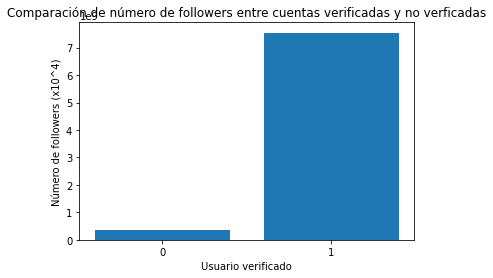

In [12]:
df2 = data.iloc[1:, [7, 4]]
verified_followers = df2.groupby(['user_verified'], as_index = False).sum()
#verified_followers
plt.bar(verified_followers.user_verified, verified_followers.user_followers)
plt.title('Comparación de número de followers entre cuentas verificadas y no verficadas')
plt.xlabel('Usuario verificado')
plt.ylabel('Número de followers (x10^9)')
plt.xticks(verified_followers.user_verified)
plt.show()

**Número de favoritos por cuentas (verificadas o no)**

El 0 representa una cuenta no verificada, mientras el 1 una cuenta verificada. 

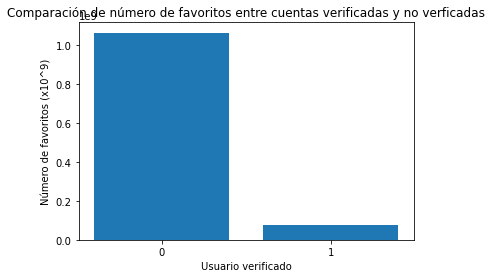

In [6]:
df3 = data.iloc[1:, [6,7]]
verified_favourites = df3.groupby(['user_verified'], as_index = False).agg('sum')
#verified_favourites
plt.bar(verified_favourites.user_verified, verified_favourites.user_favourites)
plt.title('Comparación de número de favoritos entre cuentas verificadas y no verficadas')
plt.xlabel('Usuario verificado')
plt.ylabel('Número de favoritos (x10^9)')
plt.xticks(verified_favourites.user_verified)
plt.show()

**Top 10 cuentas con más seguidores**

La próxima tabla muestra las 10 cuentas con más seguidores del archivo csv, donde podemos observar el impacto de este dato (seguidores) en el alcance de los tweets. 

In [12]:
df4 = data.drop_duplicates("user_name")
df4.sort_values(['user_followers'], ascending = False).head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
235,CGTN,"Beijing, China",#SeeTheDifference with CGTN as we bring you st...,2013-01-24 03:18:59,13892795,69,104,True,2020-07-25 12:20:00,#APEC reaffirms #COVID19 economic recovery pri...,"['APEC', 'COVID19']",TweetDeck,False
1161,NDTV,India,Breaking news alerts from India.\n\nInstagram:...,2009-05-01 20:34:48,13417047,15,0,True,2020-07-25 11:52:54,#RajasthanPoliticalCrisis | As Ashok Gehlot me...,['RajasthanPoliticalCrisis'],Twitter Media Studio - LiveCut,False
785,The Times Of India,New Delhi,News. Views. Analysis. Conversations. India’s ...,2010-04-19 10:50:15,12978547,505,5,True,2020-07-25 12:02:41,Rajasthan Government today started a Plasma Ba...,NaN,TweetDeck,False
3872,United Nations,"New York, NY",Official account of the United Nations. #Clima...,2008-03-16 20:15:36,12748145,1181,1459,True,2020-07-25 10:05:00,Whatever you are doing to stop the spread of #...,"['COVID19', 'coronavirus']",TweetDeck,False
3251,China Xinhua News,"Headquartered in Beijing, PRC",We are public media for the public good. We do...,2012-02-09 01:10:18,12681122,64,0,True,2020-07-25 10:30:16,President Cyril Ramaphosa's decision to close ...,['COVID19'],China Xinhua News,False
13557,ABP News,India,Follow for latest news alerts from India,2009-05-11 12:25:51,10172489,191,111,True,2020-07-25 02:36:09,Herd Immunity To #COVID19 Still A Long Way Off...,"['COVID19', 'WHO']",Twitter Web App,False
47268,Ivanka Trump,"Washington, DC","Wife, mother, sister, daughter. Advisor to POT...",2009-06-30 22:32:03,9222125,1479,3287,True,2020-07-31 18:29:13,The vast reach of our #FarmersToFamilies food ...,['FarmersToFamilies'],Twitter for iPhone,False
16615,UNICEF,NaN,"Double the love. 💙💙 Thanks to Pandora, every d...",2009-04-21 15:16:12,8334203,23524,16004,True,2020-07-25 00:10:02,Years of progress to prevent maternal and chil...,['COVID19'],Hootsuite Inc.,False
47022,World Health Organization (WHO),"Geneva, Switzerland",We are the #UnitedNations’ health agency. We a...,2008-04-23 19:56:27,8158987,1726,10912,True,2020-07-31 18:32:50,Numerous ongoing clinical trials are evaluatin...,['COVID19'],Twitter Web App,False
2020,Hindustan Times,India,One of India's largest media companies. Latest...,2009-04-29 10:11:34,7647627,126,2960,True,2020-07-25 11:19:29,Serum Institute of India seeks DCGI nod for ph...,['COVID19'],TweetDeck,False


**4.** Basándose en la media, mediana y desviación estándar de cada variable, ¿Qué conclusiones puedes entregar de los datos?

In [6]:
data.describe()

,user_followers,user_friends,user_favourites
count,7.443600e+04,74436.000000,7.443600e+04
mean,1.059513e+05,2154.721170,1.529747e+04
std,8.222900e+05,9365.587474,4.668971e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.660000e+02,153.000000,2.200000e+02
50%,9.600000e+02,552.000000,1.927000e+03
75%,5.148000e+03,1780.250000,1.014800e+04
max,1.389284e+07,497363.000000,2.047197e+06


La función "describe()" anteriorimente utilizada, nos muestra datos como la media, mediana y desviación estándar de las variables numéricas (floats) del archivo csv, en este caso, dichas variables son: "user_followers", "user_friends" y "user_favourites".

Con ayuda de dichos datos, podemos llegar a la conclusión de que en promedio, los tweets que se encuentran en el archivo son tweets virales, los cuales cuentan con aproximadamente 15,297 favoritos; además de que las cuentas dueñas de dichos tweets también cuentan con un número considerable de seguidores (aproximadamente 105,951); por último y en relación al punto anterior, en promedio los usuarios tienen 2154 amigos, hecho que refuerza la idea principal planteada inicialmente.

Recordando un poco, la desviación estándar mide la dispersión de una distribución de datos. Entre más dispersa está una distribución de datos, más grande es su desviación estándar. Dicho lo anterior, podemos concluir que los datos menos dispersos son el número de amigos del usuario, mientras que los más dispersos son el número de seguidores. 